In [1]:
from datetime import datetime
from pprint import pprint
import numpy as np
import pandas as pd

from one.api import ONE
from brainbox.io.one import SessionLoader, EphysSessionLoader
from iblatlas.atlas import AllenAtlas
from brainbox.io.one import SpikeSortingLoader

ba = AllenAtlas(res_um=10)

from brainbox.processing import bincount2D
import seaborn as sns

import matplotlib.pyplot as plt

from os.path import join

from pathlib import Path
from psychedelic_functions import paths

path_dict = paths()

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.colors as mcolors

/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/one/alf/files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(


In [121]:
mode = 'local'  # sets mode for all queries (one.seach* methods)
one = ONE(mode=mode)

In [175]:
df_timings = pd.read_csv('protocol_timings.csv')
df_timings['admin_time'] = df_timings['admin_time'].str.split(' ').str[4]
df_timings['admin_time'] = df_timings['admin_time'].str.split('\\').str[0]
df_timings['admin_time'] = np.float64(df_timings['admin_time'].str.split('\n').str[0])
df_timings_spontaneous = df_timings[df_timings['spontaneous_start_01'].notna()]
df_timings_spontaneous
mode = 'remote'  # sets mode for all queries (one.seach* methods)
one = ONE(mode=mode)


,eid,spontaneous_start_00,spontaneous_stop_00,rfm_start_00,rfm_stop_00,replay_start_00,replay_stop_00,spontaneous_start_01,spontaneous_stop_01,rfm_start_01,rfm_stop_01,replay_start_01,admin_time,replay_stop_01
0,d77dd225-f7a9-4d01-996b-82c3ae73d56c,52.456301,352.488467,364.755134,665.820531,3029.724119,1002.943729,3050.437273,3350.486471,3362.753138,3663.834733,4042.941732,1047.0,NaN
1,86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a,60.581288,360.630553,372.897220,673.945918,3076.041320,1010.011122,3096.895660,3396.944591,3409.211258,3710.259923,4034.342125,1111.0,NaN
2,4b398979-c54c-498f-a3d4-b201c2285be5,192.993812,493.059209,505.325876,806.408238,3081.895068,1149.644457,3102.680914,3402.730013,3414.996680,3716.062143,4073.404452,1184.0,4059.372622
3,6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde,68.303716,368.352781,380.619448,681.684678,3045.907000,1024.891867,3066.685281,3366.717948,3378.984615,3680.049745,4173.635928,1054.0,4023.264667
8,aff40fef-7ef3-4e7a-9451-f248e6d385db,92.489430,392.555194,404.821861,705.887391,2968.815543,1042.197770,2989.578826,3289.627991,3301.894658,3602.959888,4165.659292,1094.0,3938.842943
9,8057374c-baf2-4391-b290-e88743d8981a,NaN,NaN,NaN,NaN,NaN,NaN,2970.087808,3270.119742,3282.386409,3583.452272,3947.555005,1077.0,3926.733121
10,0bd26d4d-c1c1-4f59-af13-59d19b597ab6,NaN,NaN,NaN,NaN,NaN,NaN,2964.112939,3264.161871,3276.428538,3577.493768,3944.495944,1076.0,3920.885406
11,53d8cb2f-3338-4bcd-81c4-6207b660eba3,85.650914,385.715944,397.982611,699.047941,3006.530638,1042.013455,3027.283022,3327.331420,3339.598087,3640.663117,4009.951331,1146.0,3983.424584
14,debe9833-5c26-4d9e-89ba-c63e07e1db10,74.622784,374.688581,386.955247,688.004046,3049.913766,1023.915832,3070.655451,3370.704449,3382.971116,3684.036313,4039.450215,1073.0,4020.005393
15,7149e0fc-a52d-4e93-849c-edc22d54e7a5,52.628383,352.693514,364.960181,666.025344,2894.814311,1009.286428,2915.548829,3215.597395,3227.864061,3528.929458,3941.145379,1065.0,3872.214240


In [178]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


def load_rasters (eid):
        pid = one.eid2pid(eid)[0][0]
        eid_timings = df_timings_spontaneous.loc[df_timings_spontaneous['eid']==eid]
        eid_timings
        sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
        spikes, clusters, channels = sl.load_spike_sorting()
        clusters = sl.merge_clusters(spikes, clusters, channels)
        # Only keep IBL good neurons
        spikes.times = spikes.times[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        spikes.depths = spikes.depths[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        spikes.clusters = spikes.clusters[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        # Convert to mm
        spikes.depths = spikes.depths / 1000
        # Get spike raster
        iok = ~np.isnan(spikes.depths)
        R, times, depths = bincount2D(spikes.times[iok], spikes.depths[iok], xbin=0.01, ybin=0.02, weights=None)
        # %% Plot figure
        f, ax1 = plt.subplots(1, 1, figsize=(5, 2.5), dpi=300)
        ax1.imshow(R, aspect='auto', cmap='binary', vmin=0, vmax=np.std(R),
                extent=np.r_[times[[0, -1]], depths[[0, -1]]], origin='upper')
        ax1.set(ylim=[0, 4], ylabel='Depth (mm)')
        #ax1.set_title('Awake', color=colors['awake'], fontweight='bold')
        ax1.set(xticks=[ax1.get_xlim()[0] + 60, ax1.get_xlim()[0] + 660])
        ax1.text(ax1.get_xlim()[0] + 350, 4.3, '10 min', ha='center', va='center')
        ax1.axes.get_xaxis().set_visible(False)
        ax1.invert_yaxis()

        for i in np.arange(1, channels['acronym'].shape[0], 50):
                ax1.text(ax1.get_xlim()[-1]+50, channels['axial_um'][channels['acronym'].shape[0] - i] / 1000,
                channels['acronym'][i], fontsize=8)
        for key in eid_timings:
                print (key, ':', eid_timings[key].values[0])
        if key != 'eid':
                ax1.axvline(eid_timings[key].values[0], color = "red", linewidth=0.2) # add linewidth parameter to make lines thinner
                ax1.text(eid_timings[key].values[0], ax1.get_ylim()[0]-4, key, ha ='left', rotation = 45 ,color = "red", fontsize = 3) # adjust position and rotation of text
        plt.tight_layout()
        sns.despine(trim=True, offset=2)
        # plt.savefig(join(path_dict['fig_path'], 'example_raster.pdf'))
        start_index_00 = find_nearest(times, eid_timings['spontaneous_start_00'].values[0])
        stop_index_00 = find_nearest(times, eid_timings['spontaneous_stop_00'].values[0])
        start_index_01 = find_nearest(times, eid_timings['spontaneous_start_01'].values[0])
        stop_index_01 = find_nearest(times, eid_timings['spontaneous_stop_01'].values[0])
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

        spontaneous_activity_00 = R[:, start_index_00:stop_index_00]
        spontaneous_activity_01 = R[:, start_index_01:stop_index_01]


        im1 = ax1.imshow(spontaneous_activity_00, 
                aspect='auto', cmap='binary', vmin=0, vmax=np.std(R), 
                extent=np.r_[times[[start_index_00, stop_index_00-1]], depths[[0, -1]]], origin='upper')
        ax1.set_title('Spontaneous Activity #1')

        im2 = ax2.imshow(spontaneous_activity_01, 
                aspect='auto', cmap='binary', vmin=0, vmax=np.std(R), 
                extent=np.r_[times[[start_index_01, stop_index_01-1]], depths[[0, -1]]], origin='upper')
        ax2.set_title('Spontaneous Activity #2')

        # display the plot
        plt.show()
        return spontaneous_activity_00, spontaneous_activity_01


def run_PCA(spontaneous_activity_00, spontaneous_activity_01):
        # perform PCA to get the first three components
        pca = PCA(n_components=20)
        pca_result_00 = pca.fit_transform(spontaneous_activity_00.T)  # transpose to make timestamp as row
        explained_variance_00 = pca.explained_variance_ratio_ # save the explained variance for 00

        pca_result_01 = pca.fit_transform(spontaneous_activity_01.T)  # transpose to make timestamp as row
        explained_variance_01 = pca.explained_variance_ratio_ # save the explained variance for 01

        fig = plt.figure(figsize = (16,8))


        # Create a 2x2 subplot grid
        fig, ax = plt.subplots(2, 2, figsize=(16,16))

        # create the first 3D subplot
        ax1 = fig.add_subplot(2, 2, 3, projection='3d')
        ax1.plot(pca_result_00[:,0], pca_result_00[:,1], pca_result_00[:,2], marker = 'o', alpha= 0.1)
        ax1.set_title('PCA trajectory of spontaneous activity 00 \n Pre-LSD')
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        ax1.set_zlabel('PC3')

        # create the second 3D subplot
        ax2 = fig.add_subplot(2, 2, 4, projection='3d')
        ax2.plot(pca_result_01[:,0], pca_result_01[:,1], pca_result_01[:,2], marker = 'o', alpha= 0.1)
        ax2.set_title('PCA trajectory of spontaneous activity 01 \n Post-LSD')
        ax2.set_xlabel('PC1')
        ax2.set_ylabel('PC2')
        ax2.set_zlabel('PC3')

        # Create the first scree plot
        ax[0, 0].bar(np.arange(1,len(explained_variance_00)+1), explained_variance_00)
        ax[0, 0].set_title('Scree plot of spontaneous activity 00 \n Pre-LSD')
        ax[0, 0].set_xlabel('Principal Component')
        ax[0, 0].set_ylabel('Variance Explained (%)')

        # Create the second scree plot 
        ax[0, 1].bar(np.arange(1,len(explained_variance_01)+1), explained_variance_01)
        ax[0, 1].set_title('Scree plot of spontaneous activity 01 \n Post-LSD')
        ax[0, 1].set_xlabel('Principal Component')
        ax[0, 1].set_ylabel('Variance Explained (%)')

        plt.tight_layout()
        plt.show()
        plt.close()

eid : d77dd225-f7a9-4d01-996b-82c3ae73d56c
spontaneous_start_00 : 52.45630068464166
spontaneous_stop_00 : 352.48846745576327
rfm_start_00 : 364.75513434495394
rfm_stop_00 : 665.8205311160766
replay_start_00 : 3029.72411862303
replay_stop_00 : 1002.943728931003
spontaneous_start_01 : 3050.43727260764
spontaneous_stop_01 : 3350.4864710087613
rfm_start_01 : 3362.753137897952
rfm_stop_01 : 3663.834733049074
replay_start_01 : 4042.941732064043
admin_time : 1047.0
replay_stop_01 : nan


posx and posy should be finite values
posx and posy should be finite values


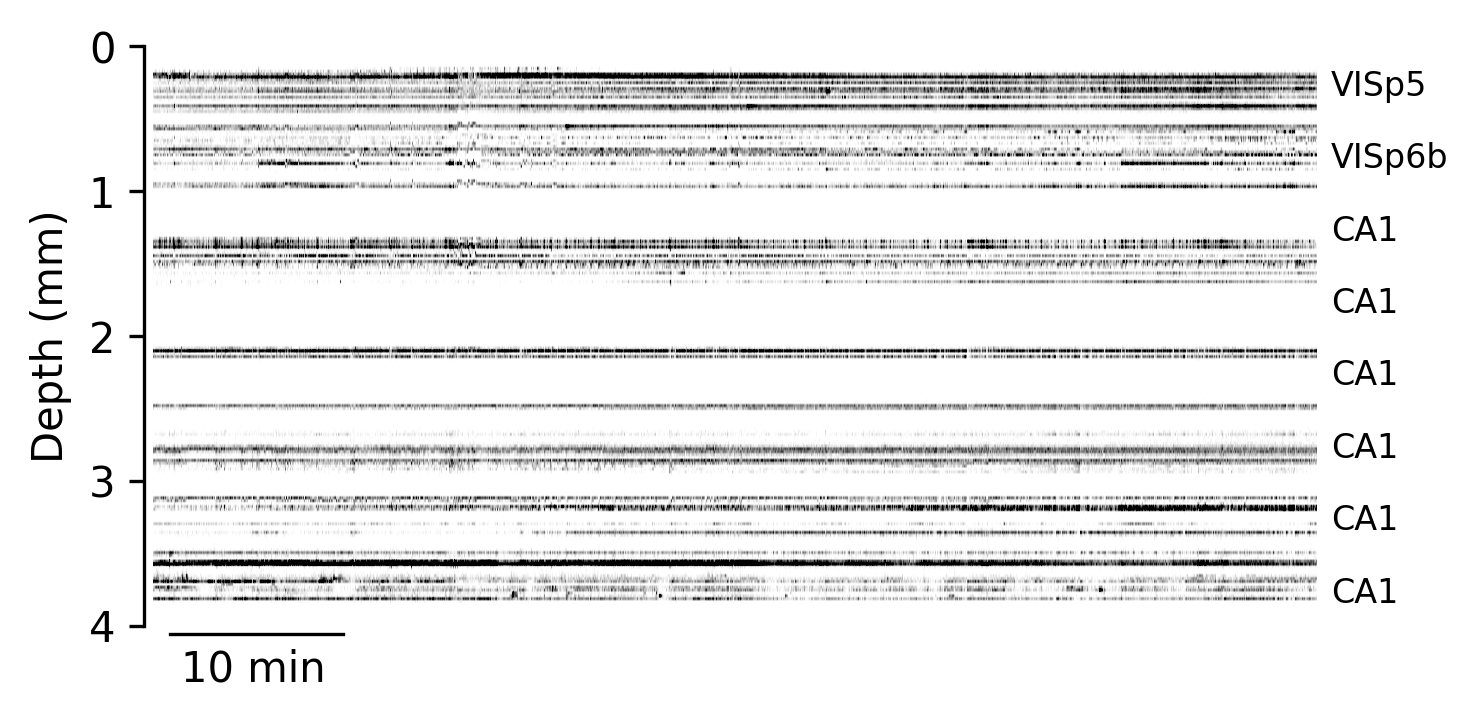

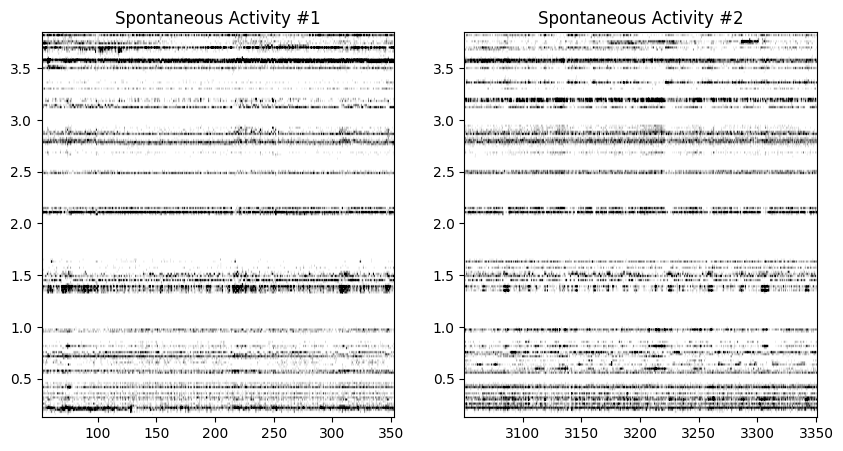

<Figure size 1600x800 with 0 Axes>

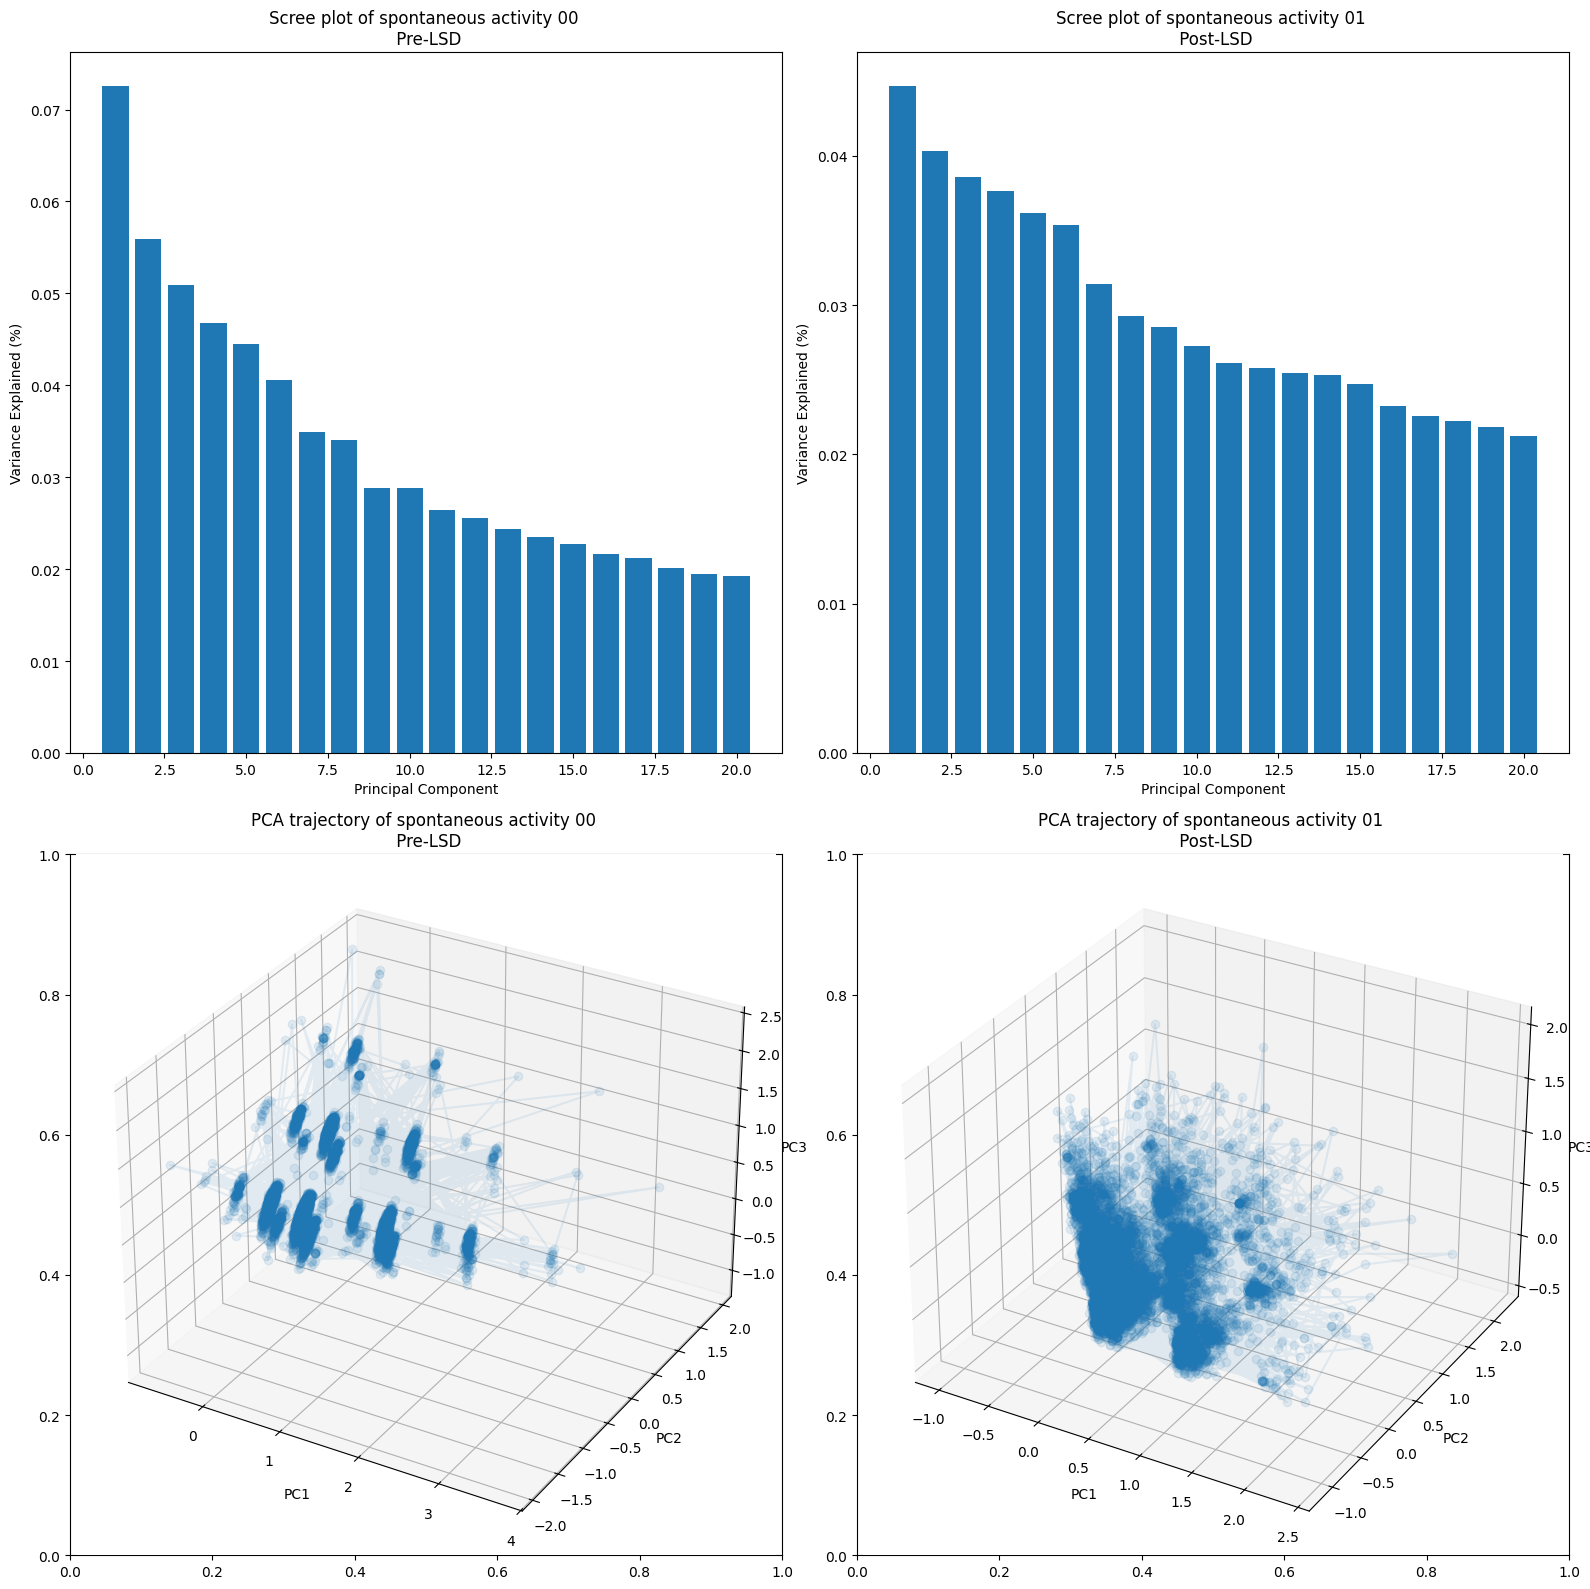

In [179]:
for eid in df_timings_spontaneous['eid']:
    spontaneous_activity_00, spontaneous_activity_01 = load_rasters (eid)
    run_PCA(spontaneous_activity_00, spontaneous_activity_01)

<Figure size 1600x800 with 0 Axes>

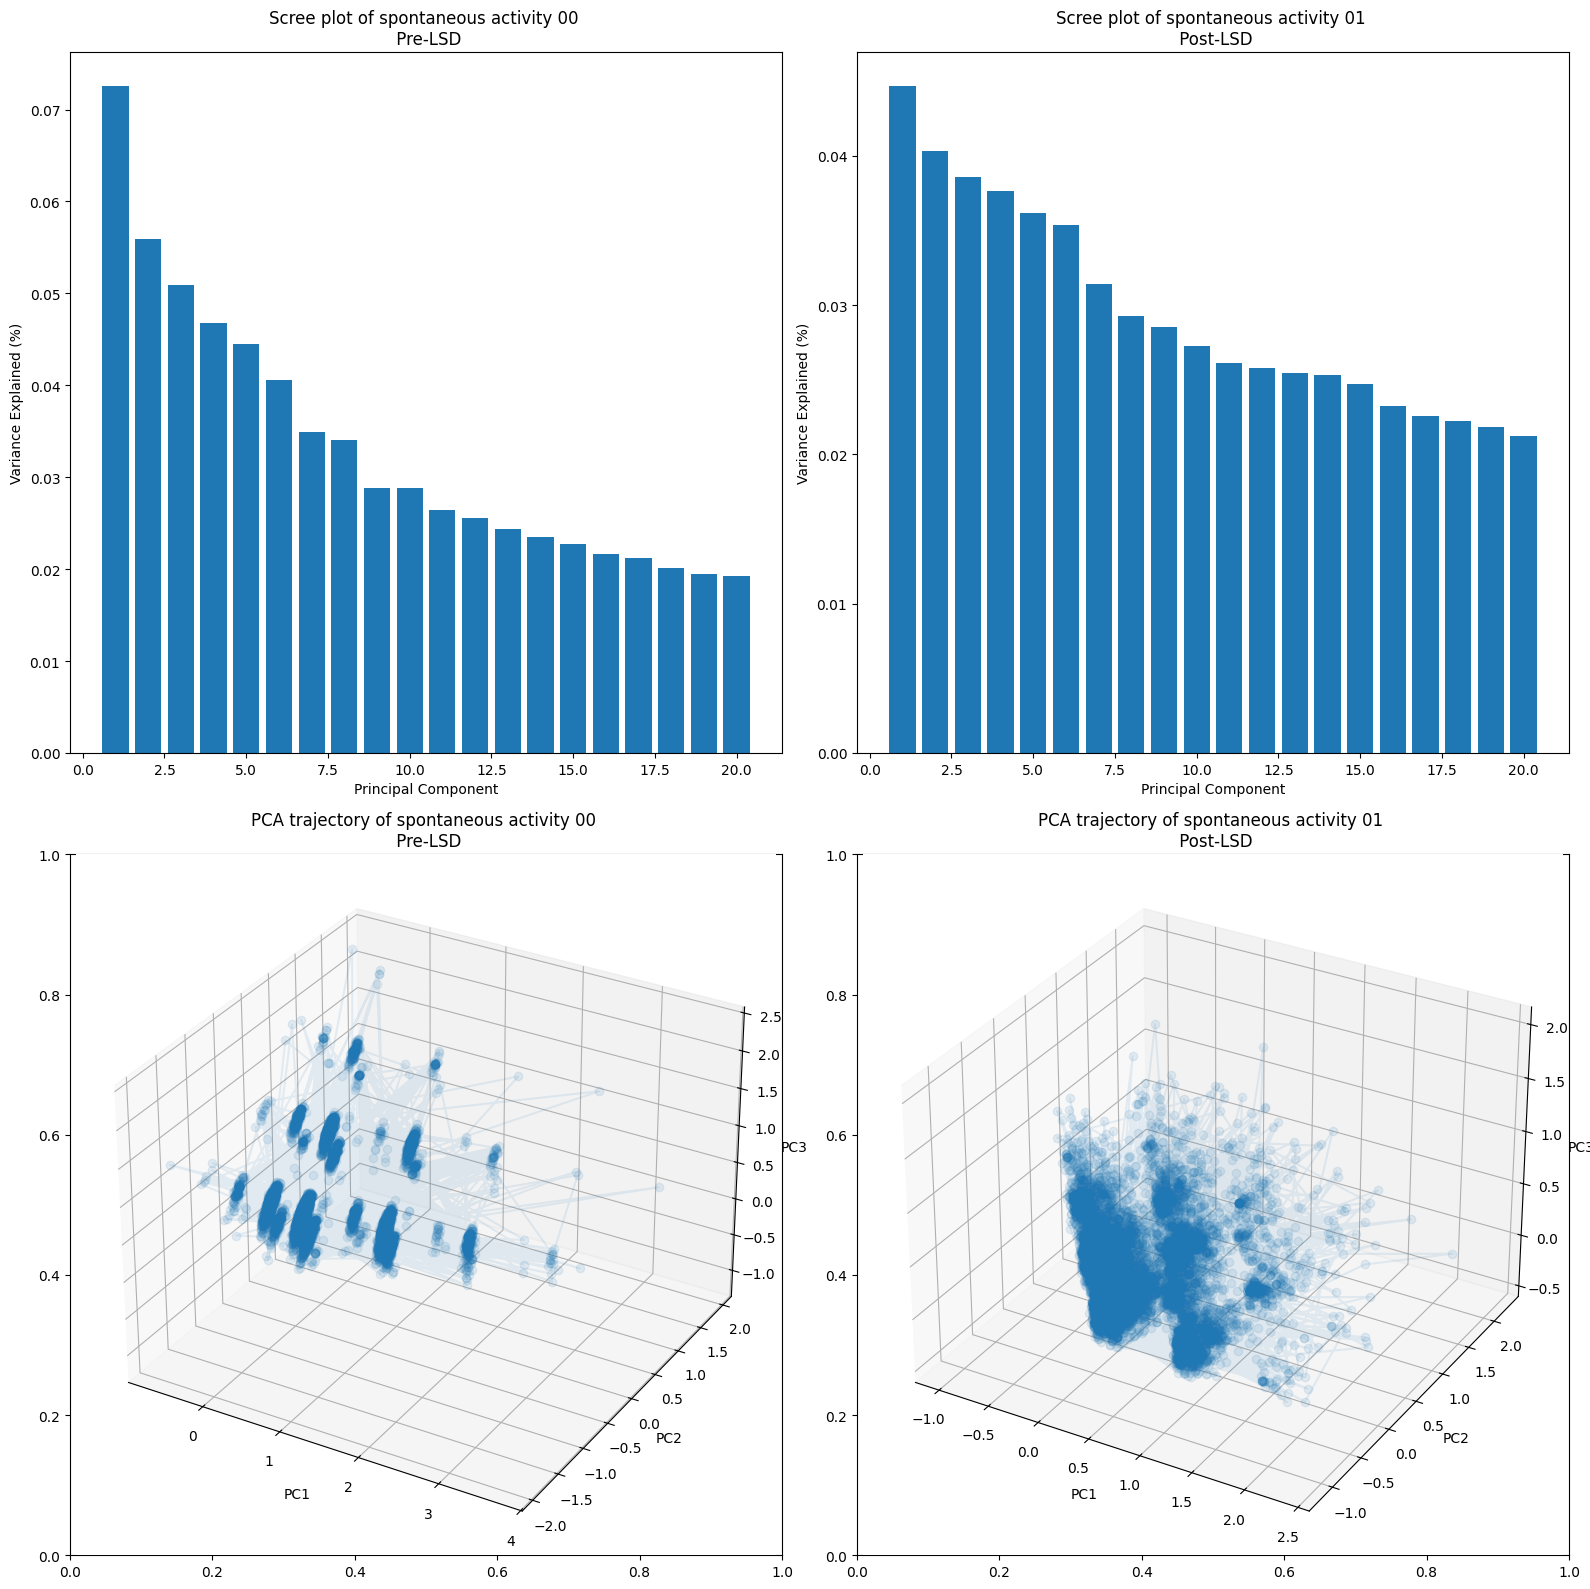

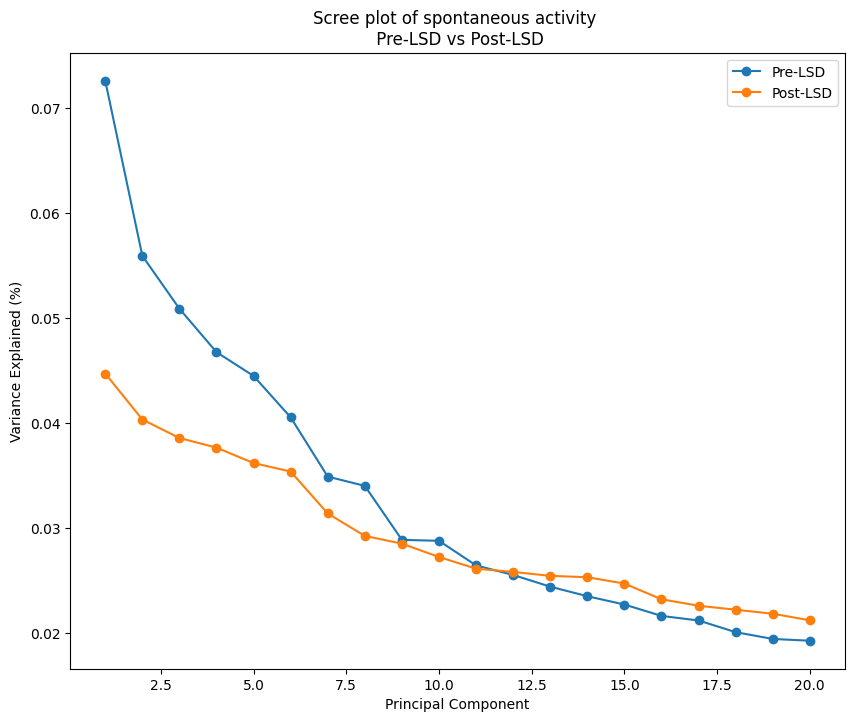

In [162]:
# Create plot
fig, ax = plt.subplots(figsize=(10,8))

# Add plots
ax.plot(np.arange(1,len(explained_variance_00)+1), explained_variance_00, marker='o', label='Pre-LSD')
ax.plot(np.arange(1,len(explained_variance_01)+1), explained_variance_01, marker='o', label='Post-LSD')

# Set labels and title
ax.set_title('Scree plot of spontaneous activity \n Pre-LSD vs Post-LSD')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained (%)')

# Add legend to differentiate the lines
ax.legend()

# Show the plot
plt.show()

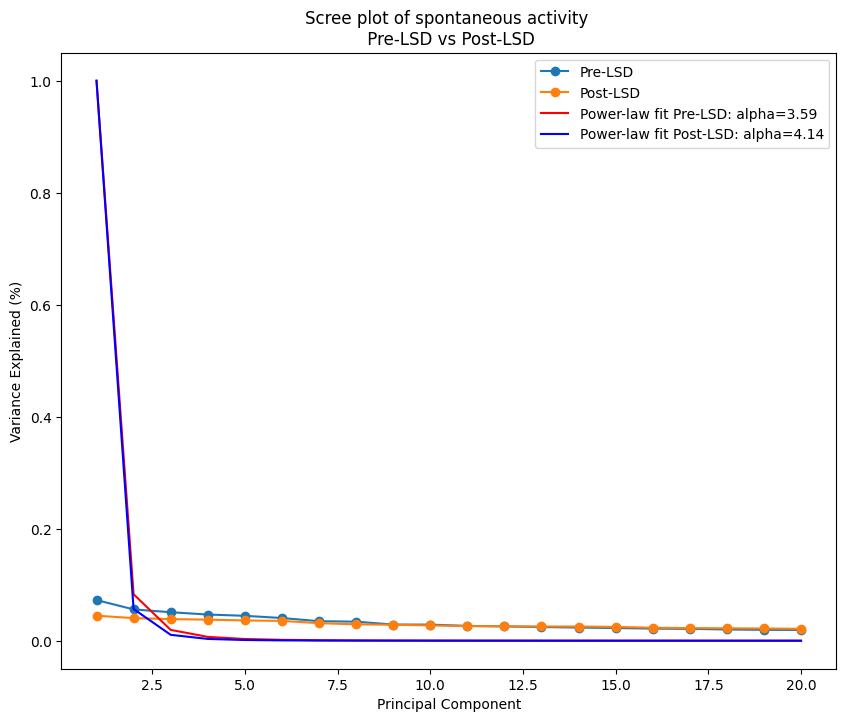

In [174]:
import scipy

def power_law(x, alpha):
    return 1 / (x ** alpha)

# Calculate power-law fit alpha for each dataset
alpha_00, _ = scipy.optimize.curve_fit(power_law, np.arange(1,len(explained_variance_00)+1), explained_variance_00) 
alpha_01, _ = scipy.optimize.curve_fit(power_law, np.arange(1,len(explained_variance_01)+1), explained_variance_01)

# x array for generating y_fit
x_fit = np.arange(1, len(explained_variance_00)+1)

# Generate prediction lines
y_fit_00 = power_law(x_fit, *alpha_00)
y_fit_01 = power_law(x_fit, *alpha_01)

# Create the plot
fig, ax = plt.subplots(figsize=(10,8))

# Add original data plots
ax.plot(x_fit, explained_variance_00, marker='o', label='Pre-LSD')
ax.plot(x_fit, explained_variance_01, marker='o', label='Post-LSD')

# Add prediction lines
ax.plot(x_fit, y_fit_00, color='red', label=f'Power-law fit Pre-LSD: alpha={alpha_00[0]:.2f}')
ax.plot(x_fit, y_fit_01, color='blue', label=f'Power-law fit Post-LSD: alpha={alpha_01[0]:.2f}')

# Set labels and title
ax.set_title('Scree plot of spontaneous activity \n Pre-LSD vs Post-LSD')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained (%)')

# Add legend to differentiate the lines
ax.legend()

# Show the plot
plt.show()